In [83]:
#import semua package/library pada sel ini, jika butuh memasukkan package/library baru maka run ulang sel ini

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.dates import date2num

%config IPCompleter.greedy=True
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#panggil dalam bentuk dataframe pada langkah kali ini, dan tampilkan dengan metode head
df = pd.read_csv('Indonesia_Covid_Update_20des21_20mar22.csv')
df.head()

,Unnamed: 0,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate,tanggal
0,658,133,-94,216,11,4260677,4829,4111835,144013,1639958400000,2021-12-20
1,659,216,0,205,11,4260893,4829,4112040,144024,1640044800000,2021-12-21
2,660,179,-83,252,10,4261072,4746,4112292,144034,1640131200000,2021-12-22
3,661,136,-104,232,8,4261208,4642,4112524,144042,1640217600000,2021-12-23
4,662,204,17,182,5,4261412,4659,4112706,144047,1640304000000,2021-12-24


In [3]:
df = df.drop(df.columns[0], axis=1)
df.head()

,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate,tanggal
0,133,-94,216,11,4260677,4829,4111835,144013,1639958400000,2021-12-20
1,216,0,205,11,4260893,4829,4112040,144024,1640044800000,2021-12-21
2,179,-83,252,10,4261072,4746,4112292,144034,1640131200000,2021-12-22
3,136,-104,232,8,4261208,4642,4112524,144042,1640217600000,2021-12-23
4,204,17,182,5,4261412,4659,4112706,144047,1640304000000,2021-12-24


In [4]:
df

,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate,tanggal
0,133,-94,216,11,4260677,4829,4111835,144013,1639958400000,2021-12-20
1,216,0,205,11,4260893,4829,4112040,144024,1640044800000,2021-12-21
2,179,-83,252,10,4261072,4746,4112292,144034,1640131200000,2021-12-22
3,136,-104,232,8,4261208,4642,4112524,144042,1640217600000,2021-12-23
4,204,17,182,5,4261412,4659,4112706,144047,1640304000000,2021-12-24
...,...,...,...,...,...,...,...,...,...,...
86,13018,-19474,32262,230,5927550,279969,5494606,152975,1647388800000,2022-03-16
87,11532,-17492,28787,237,5939082,262477,5523393,153212,1647475200000,2022-03-17
88,9528,-16498,25827,199,5948610,245979,5549220,153411,1647561600000,2022-03-18
89,7951,-16245,24008,188,5956561,229734,5573228,153599,1647648000000,2022-03-19


2. Data Preparation

Pada langkah ini kita akan menyiapkan data yang kita butuhkan. kita akan menggunakan dua kolom pada kesempatan kali ini yaitu total kasus dan tanggal. pertama kita lihat dulu detail dari dataset kita.

In [5]:
df.dtypes

positif                 int64
dirawat                 int64
sembuh                  int64
meninggal               int64
positif_kumulatif       int64
dirawat_kumulatif       int64
sembuh_kumulatif        int64
meninggal_kumulatif     int64
lastUpdate              int64
tanggal                object
dtype: object

In [6]:
df

,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate,tanggal
0,133,-94,216,11,4260677,4829,4111835,144013,1639958400000,2021-12-20
1,216,0,205,11,4260893,4829,4112040,144024,1640044800000,2021-12-21
2,179,-83,252,10,4261072,4746,4112292,144034,1640131200000,2021-12-22
3,136,-104,232,8,4261208,4642,4112524,144042,1640217600000,2021-12-23
4,204,17,182,5,4261412,4659,4112706,144047,1640304000000,2021-12-24
...,...,...,...,...,...,...,...,...,...,...
86,13018,-19474,32262,230,5927550,279969,5494606,152975,1647388800000,2022-03-16
87,11532,-17492,28787,237,5939082,262477,5523393,153212,1647475200000,2022-03-17
88,9528,-16498,25827,199,5948610,245979,5549220,153411,1647561600000,2022-03-18
89,7951,-16245,24008,188,5956561,229734,5573228,153599,1647648000000,2022-03-19


In [7]:
df.describe()

,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate
count,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000,9.100000e+01,91.000000,9.100000e+01
mean,18702.626374,2360.054945,16235.582418,106.989011,4.815475e+06,207089.175824,4.462145e+06,146240.670330,1.643846e+12
std,20110.477754,14855.530753,18059.557250,118.756192,6.464063e+05,213458.727419,4.842152e+05,3026.291713,2.282116e+09
min,92.000000,-29938.000000,112.000000,1.000000,4.260677e+06,4292.000000,4.111835e+06,144013.000000,1.639958e+12
25%,709.000000,-3514.000000,369.000000,7.000000,4.267774e+06,6822.000000,4.116805e+06,144147.000000,1.641902e+12
50%,11532.000000,299.000000,5993.000000,38.000000,4.414483e+06,115275.000000,4.154797e+06,144411.000000,1.643846e+12
75%,34073.500000,10958.000000,32888.500000,221.500000,5.481096e+06,402939.000000,4.757136e+06,147715.000000,1.645790e+12
max,64718.000000,39165.000000,61361.000000,401.000000,5.962483e+06,586113.000000,5.589057e+06,153738.000000,1.647734e+12


*Karena yang akan kita gunakan adalah kolom tanggal sebagai time-series dan kasus positif harian sebagai input kita. maka kita perhatikan dua kolom tersebut.
Pada detail kasus positif harian terlihat nilai **max** dan **min** yang sangat jauh dengan 50% data berada di angka 11000 an. jauh dari rata-rata di 18000 an. sehingga kita perlu melakukan normalisasi pada kolom tersebut. Lalu karena mesin kita bekerja dengan numerik, maka kita akan ubah tanggal kita jadi numerik.*

In [8]:
'''pada kolom ini kita akan melakukan transformasi dan menambahkan kolom baru pada dataframe kita. 
Kita beri nama kolom baru dengan data hasil normalisasi tersebut sebagai cases_norm.
Pada bagian ini saya akan menggunakan metode logaritmik, dipersilahkan jika ingin menggunakan metode yang lain
'''

df['cases_norm'] = np.log(df['positif'])
df

,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate,tanggal,cases_norm
0,133,-94,216,11,4260677,4829,4111835,144013,1639958400000,2021-12-20,4.890349
1,216,0,205,11,4260893,4829,4112040,144024,1640044800000,2021-12-21,5.375278
2,179,-83,252,10,4261072,4746,4112292,144034,1640131200000,2021-12-22,5.187386
3,136,-104,232,8,4261208,4642,4112524,144042,1640217600000,2021-12-23,4.912655
4,204,17,182,5,4261412,4659,4112706,144047,1640304000000,2021-12-24,5.318120
...,...,...,...,...,...,...,...,...,...,...,...
86,13018,-19474,32262,230,5927550,279969,5494606,152975,1647388800000,2022-03-16,9.474088
87,11532,-17492,28787,237,5939082,262477,5523393,153212,1647475200000,2022-03-17,9.352881
88,9528,-16498,25827,199,5948610,245979,5549220,153411,1647561600000,2022-03-18,9.161990
89,7951,-16245,24008,188,5956561,229734,5573228,153599,1647648000000,2022-03-19,8.981053


In [53]:
df['Date']= pd.to_datetime(df['tanggal'])
df.dtypes

positif                         int64
dirawat                         int64
sembuh                          int64
meninggal                       int64
positif_kumulatif               int64
dirawat_kumulatif               int64
sembuh_kumulatif                int64
meninggal_kumulatif             int64
lastUpdate                      int64
tanggal                        object
cases_norm                    float64
days                            int64
Date                   datetime64[ns]
dtype: object

# Data Sebelum dinormalisasi

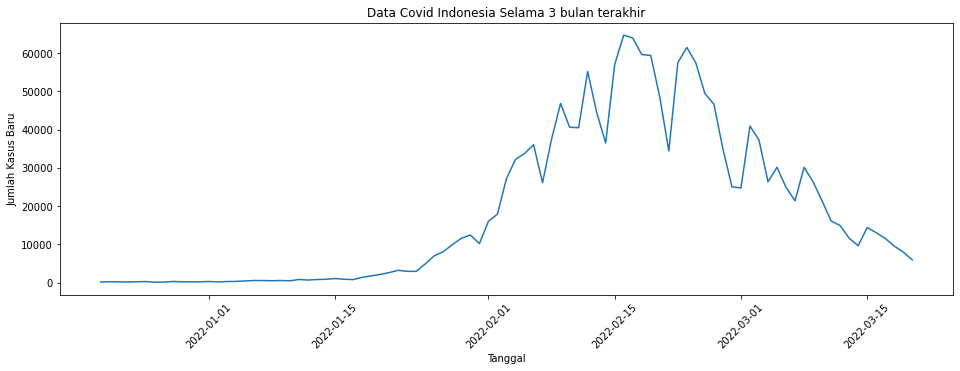

In [94]:
X = df['Date']
Y = df['positif']
# Plotting
# plt.figure(facecolor='yellow')
fig, ax = plt.subplots(figsize=(16,5), facecolor='white')
ax.plot(X, Y, linestyle='-', marker='')
ax.set_title('Data Covid Indonesia Selama 3 bulan terakhir')
plt.xlabel("Tanggal")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Kasus Baru")
plt.show()

# Data Setelah dinormalisasi

In [105]:
df

,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate,tanggal,cases_norm,days,Date
0,133,-94,216,11,4260677,4829,4111835,144013,1639958400000,2021-12-20,4.890349,0,2021-12-20
1,216,0,205,11,4260893,4829,4112040,144024,1640044800000,2021-12-21,5.375278,1,2021-12-21
2,179,-83,252,10,4261072,4746,4112292,144034,1640131200000,2021-12-22,5.187386,2,2021-12-22
3,136,-104,232,8,4261208,4642,4112524,144042,1640217600000,2021-12-23,4.912655,3,2021-12-23
4,204,17,182,5,4261412,4659,4112706,144047,1640304000000,2021-12-24,5.318120,4,2021-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,13018,-19474,32262,230,5927550,279969,5494606,152975,1647388800000,2022-03-16,9.474088,86,2022-03-16
87,11532,-17492,28787,237,5939082,262477,5523393,153212,1647475200000,2022-03-17,9.352881,87,2022-03-17
88,9528,-16498,25827,199,5948610,245979,5549220,153411,1647561600000,2022-03-18,9.161990,88,2022-03-18
89,7951,-16245,24008,188,5956561,229734,5573228,153599,1647648000000,2022-03-19,8.981053,89,2022-03-19


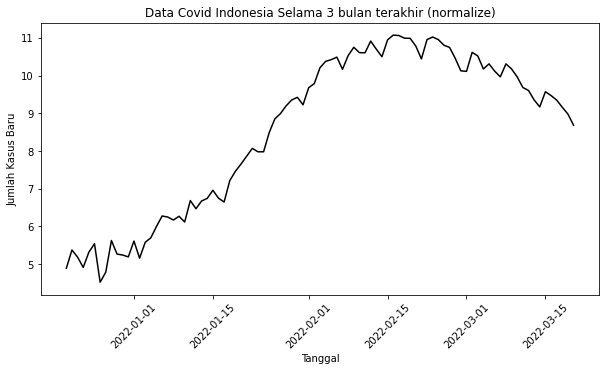

In [104]:
X = df['Date']
Y = df['cases_norm']
# Plotting
fig, ax = plt.subplots(figsize=(10,5), facecolor='white')
ax.plot(X, Y, linestyle='-', marker='', color='k')
ax.set_title('Data Covid Indonesia Selama 3 bulan terakhir (normalize)')
plt.xlabel("Tanggal")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Kasus Baru")
plt.show()

Setelah ini kita akan mengubah kolom tanggal menjadi kolom numerik dengan 1 Juli 2021 sebagai dasar. 
Artinya saya akan mengubah 

2021-12-20 menjadi 0, 

2021-12-21 menjadi 1,

beigtu seterusnya.

In [9]:
'''Dengan memanfaatkan metode to_datetime pada pandas silahkan ubah row index 0 pada tanggal dan masukkan pada suatu variabel bernama default_date.
Nilai inilah yang akan menjadi nilai pengurang untuk tanggal lainnya
'''
default_date = pd.to_datetime(df["tanggal"][0])
print(f'nilai default_date adalah : {default_date}')

nilai default_date adalah : 2021-12-20 00:00:00


Sekarang kita akan membuat fungsi yang akan mengubah semua tanggal pada kolom menjadi numerik dengan basis pada tanggal 20 Desember 2021.

In [10]:
'''Pada kesempatan kali ini kita akan memanfaatkan apply() dan lambda().
Kita akan masukkan pada sebuah kolom baru bernama days. lalu kita tampilkan dataframe terbaru
Hint
...['days'] = ....apply(lambda x: pd.Timedelta(pd.to_datetime(x) - ...).days)

'''

df['days'] = df['tanggal'].apply(lambda x: pd.Timedelta(pd.to_datetime(x) - default_date).days)
df

,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate,tanggal,cases_norm,days
0,133,-94,216,11,4260677,4829,4111835,144013,1639958400000,2021-12-20,4.890349,0
1,216,0,205,11,4260893,4829,4112040,144024,1640044800000,2021-12-21,5.375278,1
2,179,-83,252,10,4261072,4746,4112292,144034,1640131200000,2021-12-22,5.187386,2
3,136,-104,232,8,4261208,4642,4112524,144042,1640217600000,2021-12-23,4.912655,3
4,204,17,182,5,4261412,4659,4112706,144047,1640304000000,2021-12-24,5.318120,4
...,...,...,...,...,...,...,...,...,...,...,...,...
86,13018,-19474,32262,230,5927550,279969,5494606,152975,1647388800000,2022-03-16,9.474088,86
87,11532,-17492,28787,237,5939082,262477,5523393,153212,1647475200000,2022-03-17,9.352881,87
88,9528,-16498,25827,199,5948610,245979,5549220,153411,1647561600000,2022-03-18,9.161990,88
89,7951,-16245,24008,188,5956561,229734,5573228,153599,1647648000000,2022-03-19,8.981053,89


In [11]:
#isikan pada sel ini dataframe terbaru yang akan dijadikan sebagai input data dari machine learning

data_input = df[['cases_norm', 'days']]
data_input

,cases_norm,days
0,4.890349,0
1,5.375278,1
2,5.187386,2
3,4.912655,3
4,5.318120,4
...,...,...
86,9.474088,86
87,9.352881,87
88,9.161990,88
89,8.981053,89


4. Data Processing

Sekarang kita akan memproses data kita. Terdapat dua bagian, pertama adalah pembuatan model dan kedua adalah evaluasi sederhana.

In [12]:
#pembuatan model
'''import/tambahkan semua package/library pada sel paling atas(terkait library)
pada bagian kali ini kita akan mengubah days -- sumbu x dan cases_norm  -- sumbu y.
masukkan kedua kolom tersebut pada variabel yang bersesuaian. ubah menjadi bentuk numpy array dengan np.array()
Hint: gunakan .reshape((-1, 1)) pada sumbu x saat mengubah menjadi np.array agar mengubah dimensi array tersebut.
kita bagi menjadi data training dan test dengan test_size = 0.2
'''
sbx = data_input["days"]
sby = data_input["cases_norm"]
arrayx = np.array(sbx)
arrayy = np.array(sby)
X_train, X_test, y_train, y_test = tts(arrayx, arrayy, random_state = 42, test_size=0.2)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')




dimensi dari X_train : 72
dimensi dari y_train : 72
dimensi dari X_test : 19
dimensi dari y_test : 19


Sekarang kita akan membuat model kita. Kita akan menggunakan polynomial regression. perbedaannya dengan linear regression hanya pada bagian sebelum di set ke model linear regression kita akan ubah dulu dalam bentuk polynomial.

In [13]:
'''Import modul PolynomialFeatures dari sklearn.preprocessing dan taruh di sel package/library
panggil modul linear regression pada sklearn dan tempatkan di sel package/library
'''

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

mlmodel = lr()
mlmodel.fit(X_poly, y_train)

LinearRegression()

Selanjutkan kita akan melakukan evaluasi model kita dengan membuat prediksi dari x_test kita lalu bandingkan hasilnya dengan y_test. cari nilai r_square.

In [14]:
#pertama mari kita prediksi kan seluruh data x_test.
'''kita akan gunakan poly_reg.fit_transform untuk mengubah data kita menjadi bentuk polynomialnya
'''

poly_x_test = poly_reg.fit_transform(X_test)
y_pred = mlmodel.predict(poly_x_test)
y_pred

array([[ 9.29589279],
       [ 7.26081118],
       [10.19010153],
       [ 9.59194448],
       [ 3.34825795],
       [ 7.80374807],
       [ 9.21036557],
       [10.38265445],
       [ 5.32104096],
       [ 9.60561001],
       [ 9.79208468],
       [ 8.8358651 ],
       [10.35549883],
       [10.35798347],
       [ 5.67672762],
       [ 4.1762411 ],
       [ 6.6660477 ],
       [ 8.05578155],
       [ 9.91987541]])

In [15]:
'''Evaluasi model kita dengan fungsi di bawah ini
import metrics dari sklearn dan taruh di sel atas
'''
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.8911381946964789


0.89 adalah angka yang cukup baik. Sekarang kita lanjut untuk membuat prediksi data kita.
Ingat, di awal kita ingin memprediksi data kita 15 hari semenjak data terakhir.
buat numpy array dari 91 - 105

In [16]:
#buat variabel numpy array yang diminta dan tampilkan. beri nama variabelnya predict_date

predict_date = np.array([x for x in range (91, 106)]).reshape(-1,1)
predict_date

array([[ 91],
       [ 92],
       [ 93],
       [ 94],
       [ 95],
       [ 96],
       [ 97],
       [ 98],
       [ 99],
       [100],
       [101],
       [102],
       [103],
       [104],
       [105]])

In [17]:
#lakukan prediksi dengan berbasis pada predict_date. manfaatkan kembali poly_reg.fit_transform dan pol_reg.predict.
#beri nama variabelnya predict_cases dan tampilkan

poly_x_test = poly_reg.fit_transform(predict_date)
predict_cases = mlmodel.predict(poly_x_test)
predict_cases

array([[9.36265182],
       [9.27974261],
       [9.19359424],
       [9.1042067 ],
       [9.01158   ],
       [8.91571415],
       [8.81660912],
       [8.71426494],
       [8.6086816 ],
       [8.49985909],
       [8.38779742],
       [8.27249659],
       [8.1539566 ],
       [8.03217744],
       [7.90715913]])

In [26]:
tanggal = pd.date_range(start='21/3/2022', periods=15)

DatetimeIndex(['2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03', '2022-04-04'],
              dtype='datetime64[ns]', freq='D')

In [27]:
tanggal1 = pd.DataFrame(tanggal, columns=['tanggal_prediksi'])
hari1 = pd.DataFrame(predict_date, columns=['hari_ke'])
kasus1 = pd.DataFrame(predict_cases, columns=['prediksi_jumlah_kasus'])

In [28]:
hasil_prediksi = pd.concat([tanggal1,hari1,kasus1], axis=1, join='outer')

In [29]:
hasil_prediksi

,tanggal_prediksi,hari_ke,prediksi_jumlah_kasus
0,2022-03-21,91,9.362652
1,2022-03-22,92,9.279743
2,2022-03-23,93,9.193594
3,2022-03-24,94,9.104207
4,2022-03-25,95,9.011580
5,2022-03-26,96,8.915714
6,2022-03-27,97,8.816609
7,2022-03-28,98,8.714265
8,2022-03-29,99,8.608682
9,2022-03-30,100,8.499859


In [36]:
#datetime to date conversion
hasil_prediksi['tanggal_prediksi'] = pd.to_datetime(hasil_prediksi['tanggal_prediksi']).dt.date
hasil_prediksi['tanggal_prediksi']

0     2022-03-21
1     2022-03-22
2     2022-03-23
3     2022-03-24
4     2022-03-25
5     2022-03-26
6     2022-03-27
7     2022-03-28
8     2022-03-29
9     2022-03-30
10    2022-03-31
11    2022-04-01
12    2022-04-02
13    2022-04-03
14    2022-04-04
Name: tanggal_prediksi, dtype: object

5. Data Analysis
Pada kesempatan kali ini kita akan melakukan analysis. Pertama dengan membuat grafik 15 hari kedepan. lalu menganalisis grafik dan model kita.

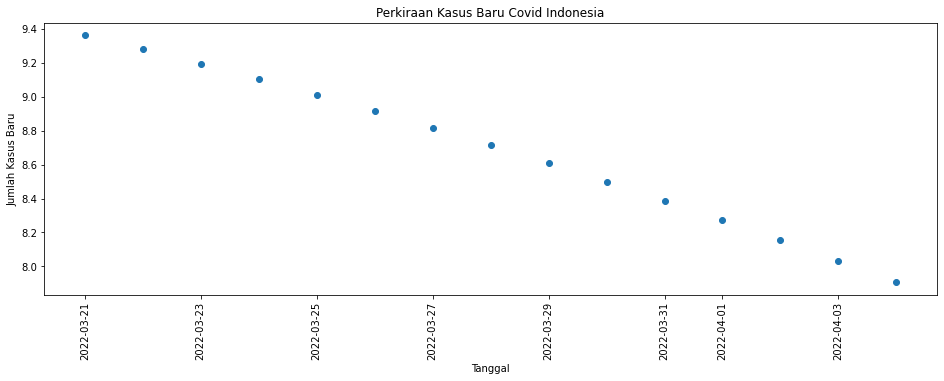

In [48]:
X = hasil_prediksi['tanggal_prediksi']
Y = hasil_prediksi['prediksi_jumlah_kasus']
# Plotting
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(X, Y, linestyle='', marker='o')
ax.set_title('Perkiraan Kasus Baru Covid Indonesia')
plt.xlabel("Tanggal")
plt.xticks(rotation=90)
plt.ylabel("Jumlah Kasus Baru")
plt.show()

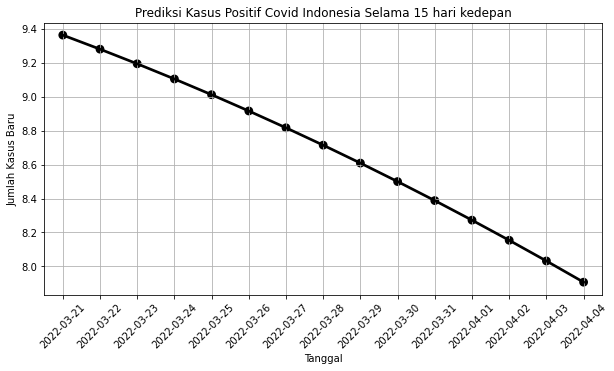

In [102]:
plt.figure(figsize=(10,5), facecolor='white')
sns.pointplot(data=hasil_prediksi, x = hasil_prediksi['tanggal'], y = hasil_prediksi['cases_norm'], markers='o', linestyles='-', color='k')
plt.title("Prediksi Kasus Positif Covid Indonesia Selama 15 hari kedepan")
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Menggabungkan data dengan hasil prediksi

In [73]:
df.head(5)

,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate,tanggal,cases_norm,days,Date
0,133,-94,216,11,4260677,4829,4111835,144013,1639958400000,2021-12-20,4.890349,0,2021-12-20
1,216,0,205,11,4260893,4829,4112040,144024,1640044800000,2021-12-21,5.375278,1,2021-12-21
2,179,-83,252,10,4261072,4746,4112292,144034,1640131200000,2021-12-22,5.187386,2,2021-12-22
3,136,-104,232,8,4261208,4642,4112524,144042,1640217600000,2021-12-23,4.912655,3,2021-12-23
4,204,17,182,5,4261412,4659,4112706,144047,1640304000000,2021-12-24,5.318120,4,2021-12-24


In [75]:
hasil_prediksi.rename(columns={'tanggal_prediksi': 'tanggal', 'hari_ke': 'days', 'prediksi_jumlah_kasus': 'cases_norm'}, inplace=True)

In [78]:
hasil_prediksi['Date']= pd.to_datetime(hasil_prediksi['tanggal'])

In [79]:
hasil_prediksi

,tanggal,days,cases_norm,Date
0,2022-03-21,91,9.362652,2022-03-21
1,2022-03-22,92,9.279743,2022-03-22
2,2022-03-23,93,9.193594,2022-03-23
3,2022-03-24,94,9.104207,2022-03-24
4,2022-03-25,95,9.011580,2022-03-25
5,2022-03-26,96,8.915714,2022-03-26
6,2022-03-27,97,8.816609,2022-03-27
7,2022-03-28,98,8.714265,2022-03-28
8,2022-03-29,99,8.608682,2022-03-29
9,2022-03-30,100,8.499859,2022-03-30


In [80]:
datagabung = pd.concat([df,hasil_prediksi], ignore_index=True)
datagabung

,positif,dirawat,sembuh,meninggal,positif_kumulatif,dirawat_kumulatif,sembuh_kumulatif,meninggal_kumulatif,lastUpdate,tanggal,cases_norm,days,Date
0,133.0,-94.0,216.0,11.0,4260677.0,4829.0,4111835.0,144013.0,1.639958e+12,2021-12-20,4.890349,0,2021-12-20
1,216.0,0.0,205.0,11.0,4260893.0,4829.0,4112040.0,144024.0,1.640045e+12,2021-12-21,5.375278,1,2021-12-21
2,179.0,-83.0,252.0,10.0,4261072.0,4746.0,4112292.0,144034.0,1.640131e+12,2021-12-22,5.187386,2,2021-12-22
3,136.0,-104.0,232.0,8.0,4261208.0,4642.0,4112524.0,144042.0,1.640218e+12,2021-12-23,4.912655,3,2021-12-23
4,204.0,17.0,182.0,5.0,4261412.0,4659.0,4112706.0,144047.0,1.640304e+12,2021-12-24,5.318120,4,2021-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-31,8.387797,101,2022-03-31
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-01,8.272497,102,2022-04-01
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-02,8.153957,103,2022-04-02
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-03,8.032177,104,2022-04-03


In [106]:
Hasil_akhir_fix = datagabung[['tanggal', 'days', 'cases_norm']]

In [107]:
Hasil_akhir_fix

,tanggal,days,cases_norm
0,2021-12-20,0,4.890349
1,2021-12-21,1,5.375278
2,2021-12-22,2,5.187386
3,2021-12-23,3,4.912655
4,2021-12-24,4,5.318120
...,...,...,...
101,2022-03-31,101,8.387797
102,2022-04-01,102,8.272497
103,2022-04-02,103,8.153957
104,2022-04-03,104,8.032177


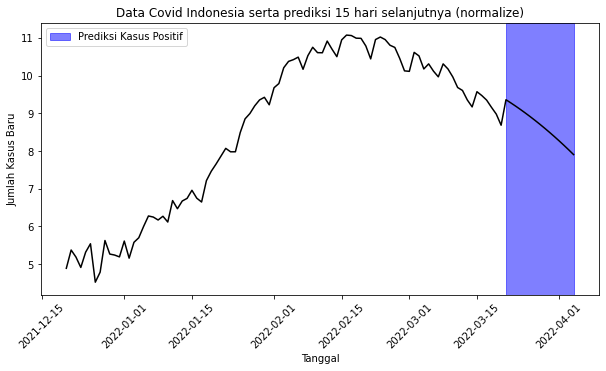

In [101]:
X = datagabung['Date']
Y = datagabung['cases_norm']
# Plotting
fig, ax = plt.subplots(figsize=(10,5), facecolor='white')
ax.plot(X, Y, linestyle='-', marker='', color='k')
ax.axvspan(date2num(datetime(2022,3,21)), date2num(datetime(2022,4,4)), 
           label="Prediksi Kasus Positif",color="b", alpha=0.5)
ax.legend()
ax.set_title('Data Covid Indonesia serta prediksi 15 hari selanjutnya (normalize)')
plt.xlabel("Tanggal")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Kasus Baru")
plt.show()

# Analisis

1. Dari hasil prediksi kita dapat melihat bahwa terdapat tren penurunan kasus harian baru Covid 19 di Indonesia selama 15 Hari kedepan, dengan asumsi bahwa tidak terdapat kasus varian baru/khusus yang dapat terjadi lonjakan (outbreak) covid 19;

2. Alasan pemilihan algoritma polinomial regression karena data yang kita punya tidak selalu lurus/linier, sehingga regresi polynomial sangat cocok digunakan pada contoh kasus ini karena model yang dihasilkan dapat lebih fleksibel sehingga bisa menyesuaikan jenis data yang agak lebih kompleks.